In [12]:
#all libraries here
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


### Dataset Information

In [2]:
train_df=pd.read_csv('cleaned_batman_final_train.csv')
test_df=pd.read_csv('cleaned_batman_final_test_updated.csv')

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
NumberOfPassengers           200000 non-null int64
distance                     200000 non-null float64
month_Apr                    200000 non-null int64
month_Feb                    200000 non-null int64
month_Jan                    200000 non-null int64
month_Jul                    200000 non-null int64
month_Jun                    200000 non-null int64
month_Mar                    200000 non-null int64
month_May                    200000 non-null int64
part_of_month_early month    200000 non-null int64
part_of_month_end month      200000 non-null int64
part_of_month_mid month      200000 non-null int64
weekday_Friday               200000 non-null int64
weekday_Monday               200000 non-null int64
weekday_Saturday             200000 non-null int64
weekday_Sunday               200000 non-null int64
weekday_Thursday             200000 non-null int64
weekday_Tuesday     

In [3]:
#new copy
dataframe=train_df.copy()

In [4]:
#dividing dataframe into features and target variable
target=dataframe['duration']
features=dataframe.drop(columns=['duration'])

### Modeling

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 799968 samples.
Testing set has 199992 samples.


#### Functions to calculate metrics to evaluate regression model: R Square,Adjusted R Square, MSE, RMSE, MAE

In [7]:
def cal_metrics(y_true, y_pred):
    print('R2 Score: {}'.format(r2_score(y_true, y_pred)))
    print('MSE: {}'.format(mean_squared_error(y_true, y_pred)))
    print('RMSE: {}'.format(math.sqrt(mean_squared_error(y_true, y_pred))))
    print('MAE: {}'.format(mean_absolute_error(y_true, y_pred)))

#### Models:

Linear Regression Model:

********* On Test Data *************
R2 Score: 0.6642082411823583
MSE: 0.2013567843574061
RMSE: 0.4487279625312045
MAE: 0.32822684844961414

********* On Train Data *************
R2 Score: 0.664786750121625
MSE: 0.20049789122142078
RMSE: 0.4477699087940376
MAE: 0.32812284709317363


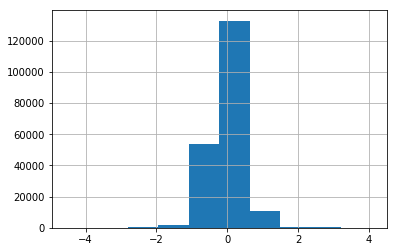

In [8]:
model_lr=LinearRegression()
model_lr.fit(X_train, y_train)

print('********* On Test Data *************')
preds_lr=model_lr.predict(X_test)
cal_metrics(y_test, preds_lr)

print()
print('********* On Train Data *************')
train_lr=model_lr.predict(X_train)
cal_metrics(y_train, train_lr)

#residual curve
(y_test-preds_lr).hist();

Ridge Model:

********* On Test Data *************
R2 Score: 0.6642078389306632
MSE: 0.2013570255667441
RMSE: 0.4487282313012455
MAE: 0.3282253946206945

********* On Train Data *************
R2 Score: 0.6647883653685726
MSE: 0.2004969251092313
RMSE: 0.4477688299884566
MAE: 0.32812179148948045


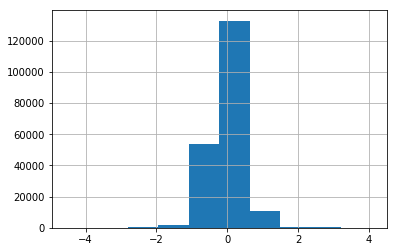

In [9]:
model_rd=Ridge(alpha=0.01)
model_rd.fit(X_train, y_train)

print('********* On Test Data *************')
preds_rd=model_rd.predict(X_test)
cal_metrics(y_test, preds_rd)

print()
print('********* On Train Data *************')
train_rd=model_rd.predict(X_train)
cal_metrics(y_train, train_rd)

#residual curve
(y_test-preds_rd).hist();

Lasso Model:

********* On Test Data *************
R2 Score: 0.6501042033027845
MSE: 0.20981423942981695
RMSE: 0.45805484325549595
MAE: 0.337226303148427

********* On Train Data *************
R2 Score: 0.6506955195339768
MSE: 0.20892614403828688
RMSE: 0.4570843948750459
MAE: 0.3371151634461911


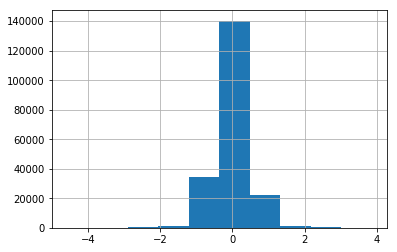

In [10]:
model_ls=Lasso(alpha=0.01)
model_ls.fit(X_train, y_train)

print('********* On Test Data *************')
preds_ls=model_ls.predict(X_test)
cal_metrics(y_test, preds_ls)

print()
print('********* On Train Data *************')
train_ls=model_ls.predict(X_train)
cal_metrics(y_train, train_ls)

#residual curve
(y_test-preds_ls).hist();

Random Forest

C:\Users\Abhijeet\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********* On Test Data *************
R2 Score: 0.6244555687831514
MSE: 0.22519438630482222
RMSE: 0.4745465059452258
MAE: 0.3452417646992064

********* On Train Data *************
R2 Score: 0.9252271295136768
MSE: 0.04472318101542725
RMSE: 0.21147855923338246
MAE: 0.13702546998690668


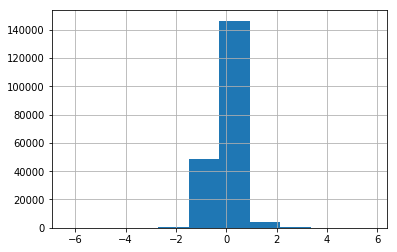

In [13]:
model_rf=RandomForestRegressor()
model_rf.fit(X_train, y_train)

print('********* On Test Data *************')
preds_rf=model_rf.predict(X_test)
cal_metrics(y_test, preds_rf)

print()
print('********* On Train Data *************')
train_rf=model_rf.predict(X_train)
cal_metrics(y_train, train_rf)

#residual curve
(y_test-preds_rf).hist();

Desicion Tree Regressor:


********* On Test Data *************
R2 Score: 0.38859965755106096
MSE: 0.36662486102701636
RMSE: 0.6054955499646685
MAE: 0.4458008234806368

********* On Train Data *************
R2 Score: 0.987475572129909
MSE: 0.007491116110771712
RMSE: 0.08655123402223514
MAE: 0.003916229640439926


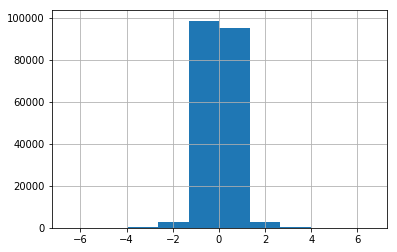

In [14]:
model_dtr=DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)

print('********* On Test Data *************')
preds_dtr=model_dtr.predict(X_test)
cal_metrics(y_test, preds_dtr)

print()
print('********* On Train Data *************')
train_dtr=model_dtr.predict(X_train)
cal_metrics(y_train, train_dtr)

#residual curve
(y_test-preds_dtr).hist();


# Results:

In [11]:
#result
np.exp(preds_lr) #here I have passed predictions of linear regression model

array([1995.28317133,  459.04598518,  970.2594176 , ...,  277.83131811,
        673.74243933, 1532.54691282])

# Final Predictions (On Competition Test Data)

In [15]:
#training linear regression model on the complete training data now

#dividing dataframe into features and target variable
dataframe=train_df.copy()
target=dataframe['duration']
features=dataframe.drop(columns=['duration'])

model_lr=LinearRegression()
model_lr.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#predicting duration for test data file
final_preds=model_lr.predict(test_df)
final_preds=np.exp(final_preds)

In [17]:
#convering the array to a dataframe
final_dataframe=pd.DataFrame(final_preds, columns=['duration'])

In [18]:
#first few rows of the dataframe
final_dataframe.head()

,duration
0,579.651324
1,268.610324
2,283.328342
3,356.111591
4,808.606584


In [19]:
#saving
final_dataframe.to_csv('./FINAL ML RESULTS/duration.csv', index=False)